E: Não foi possível abrir arquivo de trava /var/lib/dpkg/lock-frontend - open (13: Permissão negada)
E: Impossível adquirir a trava da interface do dpkg (/var/lib/dpkg/lock-frontend), você é root?
Dados gerados:
  country  year  gdp_per_capita  gdp_growth  education_rate  \
0     BRA  2010    19352.465824    0.026477       96.620001   
1     BRA  2011    20045.131760    0.035792       97.273488   
2     BRA  2012    19951.768237    0.015366       97.433709   
3     BRA  2013    19931.266708    0.009872       98.308549   
4     BRA  2014    21003.259542    0.020675       97.480202   

   education_expenditure  years_of_schooling  innovation_index  \
0               3.780093            7.091962          0.240659   
1               3.102922           12.789369          0.782710   
2               4.521211            9.673295          0.502362   
3               4.460723            8.564533          0.519249   
4               5.962073            6.325153          0.625281   

   inequalit

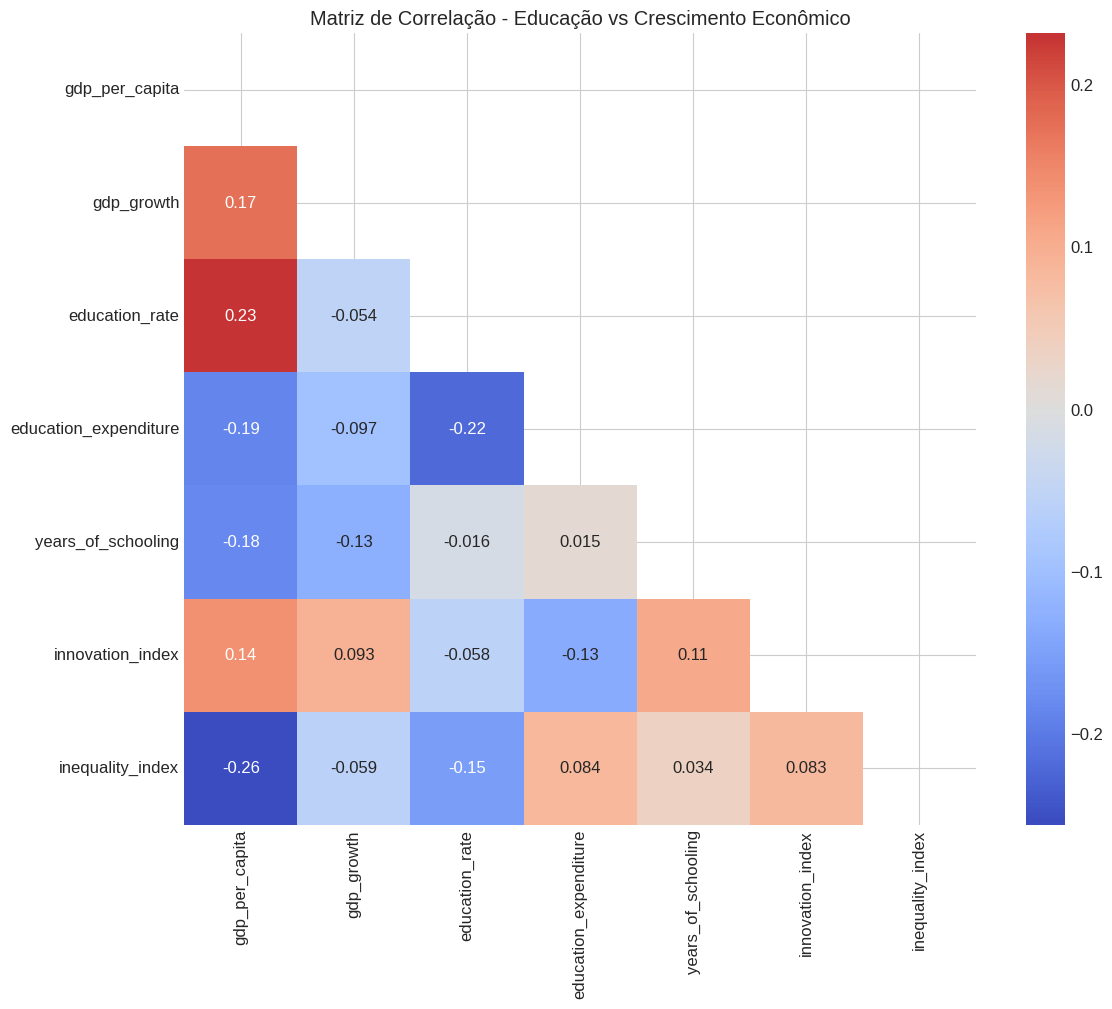

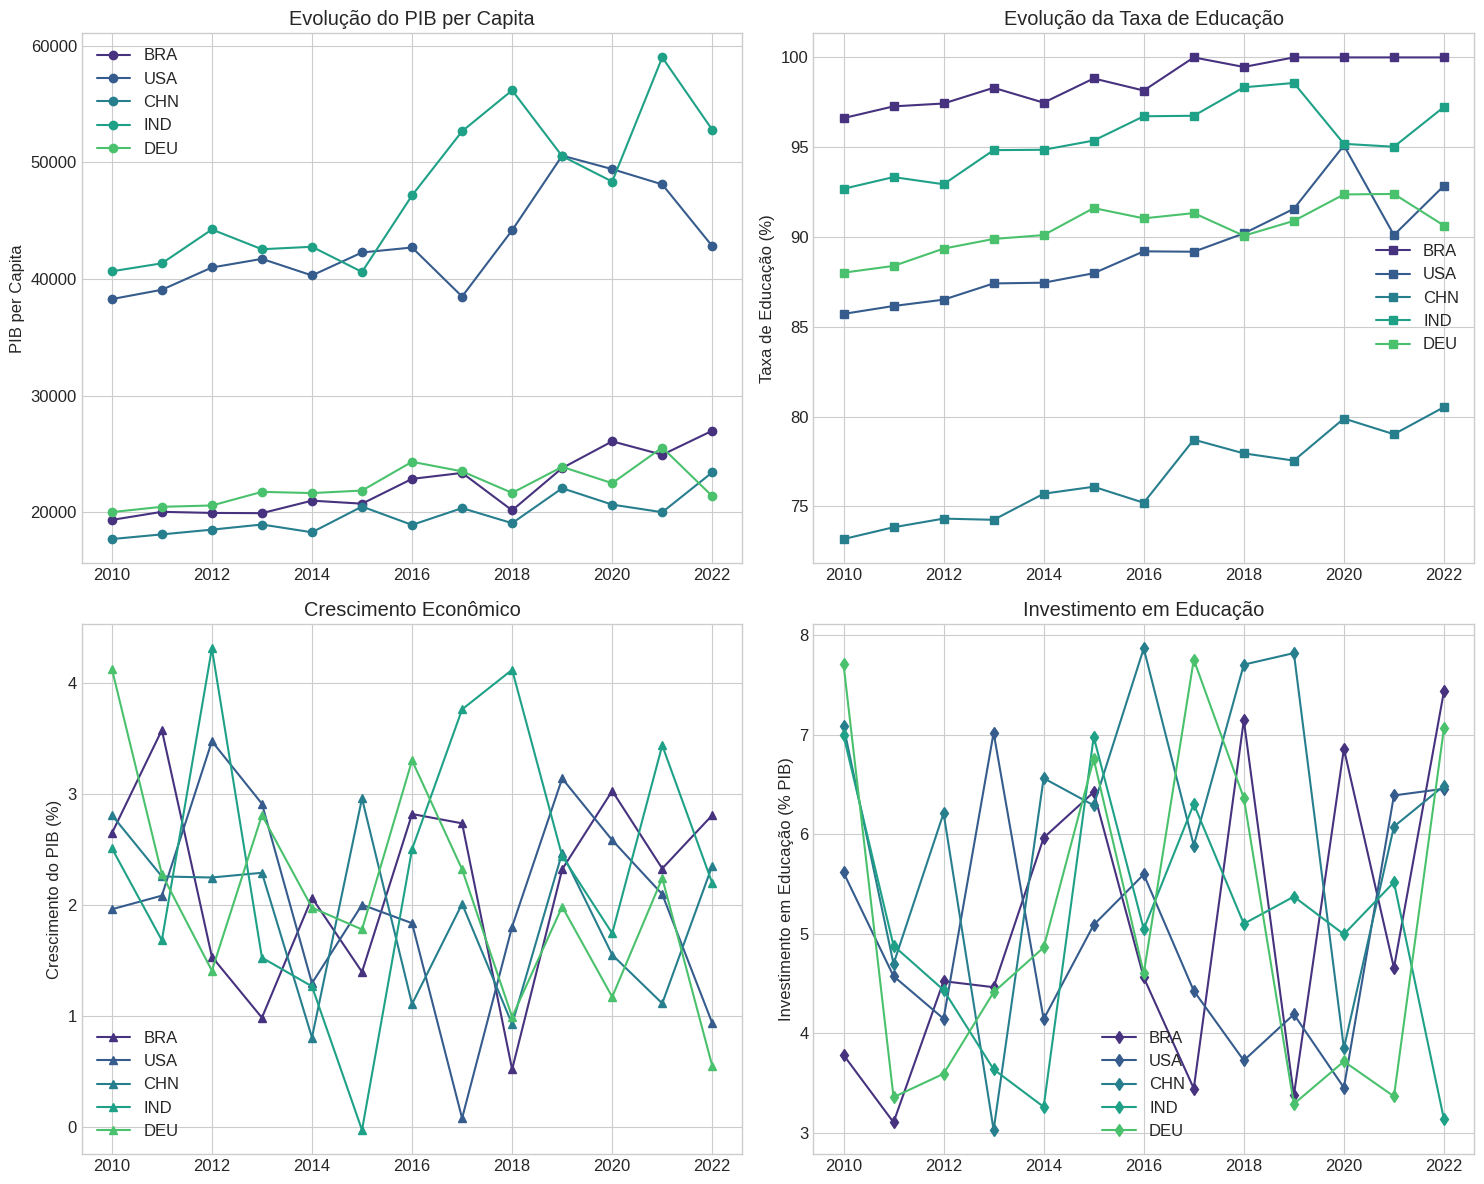

Estatísticas Descritivas:
              year  gdp_per_capita  gdp_growth  education_rate  \
count   130.000000      130.000000  130.000000      130.000000   
mean   2016.000000    28295.845069    0.020345       89.496173   
std       3.756132    12114.530070    0.010987        8.228593   
min    2010.000000     7090.563951   -0.006969       72.338020   
25%    2013.000000    20502.457459    0.012985       82.521036   
50%    2016.000000    23882.310322    0.020616       91.336578   
75%    2019.000000    38484.045737    0.027940       96.696561   
max    2022.000000    58991.017607    0.050789      100.000000   

       education_expenditure  years_of_schooling  innovation_index  \
count             130.000000          130.000000        130.000000   
mean                5.333479            9.541595          0.518325   
std                 1.475195            2.042831          0.206089   
min                 3.025308            6.116115          0.217770   
25%                 3.979001 

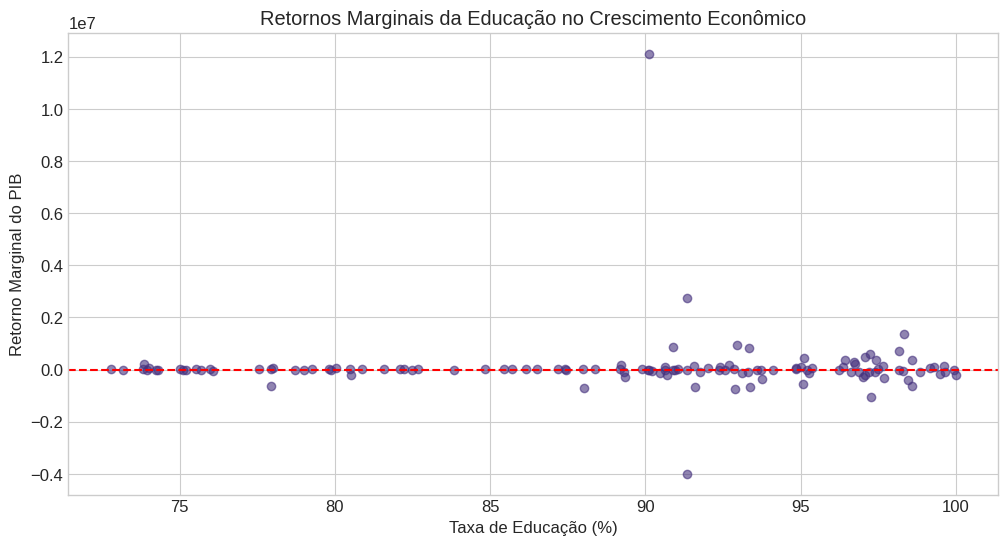

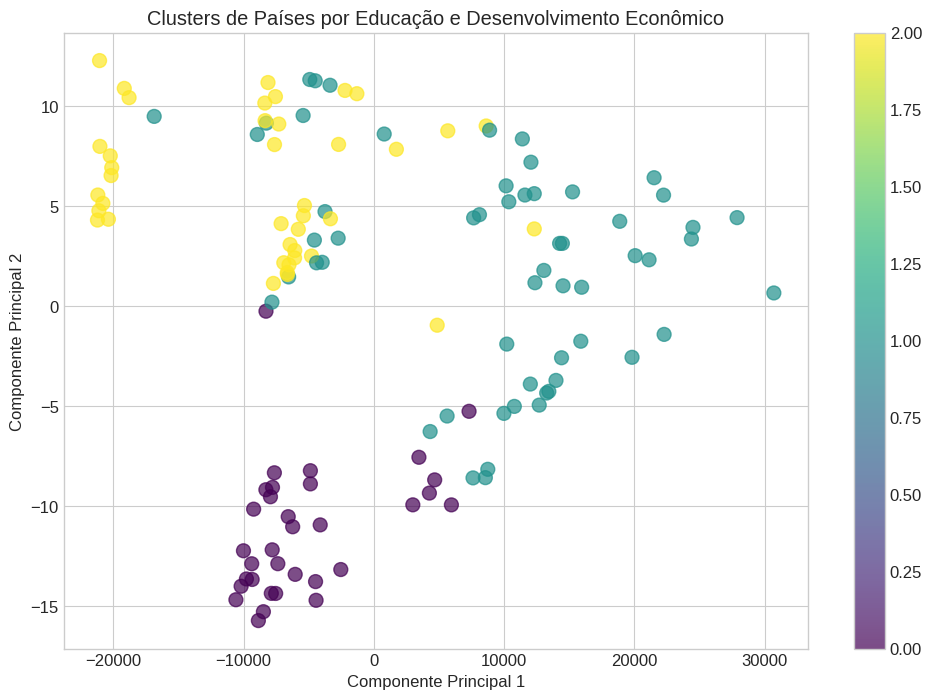

Análise dos Clusters:
         education_rate  education_expenditure  gdp_per_capita  gdp_growth
cluster                                                                   
0             77.536780               6.157805    23091.218175    0.021915
1             93.088289               4.441046    37452.431996    0.023975
2             94.243908               5.925125    19541.525885    0.013878
Resultados Diferenças-em-Diferenças:
                            OLS Regression Results                            
Dep. Variable:             gdp_growth   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     4.311
Date:                Tue, 26 Aug 2025   Prob (F-statistic):            0.00625
Time:                        14:42:23   Log-Likelihood:                 408.83
No. Observations:                 130   AIC:                            -809.7
Df Residuals:

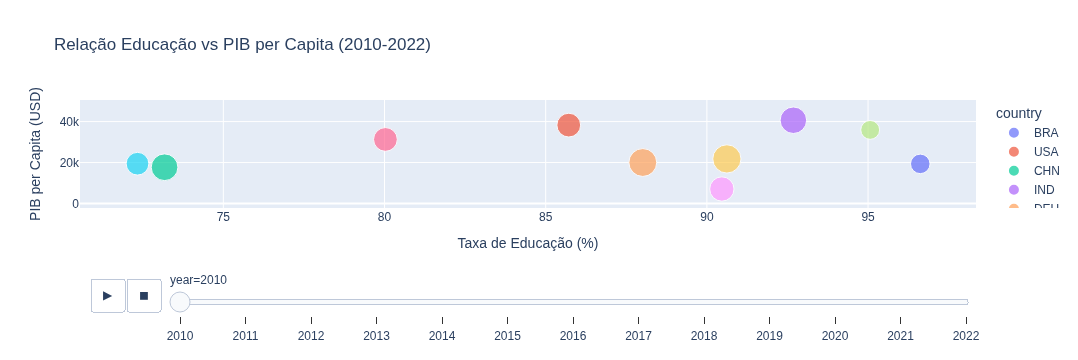

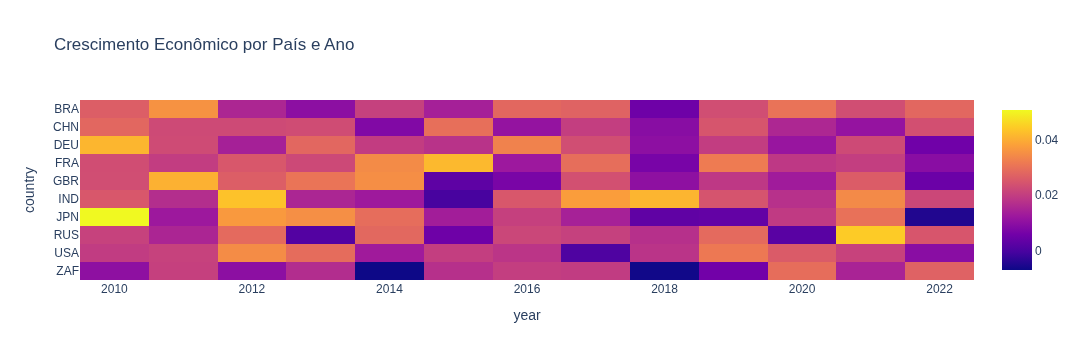

PRINCIPAIS CONCLUSÕES:
• Correlação fraca encontrada entre educação e crescimento econômico (r = 0.232)
• Aumentar investimento em educação básica e superior
• Focar em qualidade educacional além de quantidade
• Desenvolver programas de educação técnica e vocacional
• Promover parcerias entre universidades e indústrias
Resultados Detalhados da Análise Estatística:
normality_gdp: ShapiroResult(statistic=np.float64(0.9488962480390795), pvalue=np.float64(9.331490221464084e-05))
normality_education: ShapiroResult(statistic=np.float64(0.9070561088452755), pvalue=np.float64(1.8647053534207122e-07))
stationarity_gdp: (np.float64(-3.2276086979608674), np.float64(0.018441176713509977), 1, 128, {'1%': np.float64(-3.4825006939887997), '5%': np.float64(-2.884397984161377), '10%': np.float64(-2.578960197753906)}, np.float64(2343.8519863533274))
heteroscedasticity: (np.float64(18.088513843095807), np.float64(0.00011806716251650842), np.float64(10.263652717703827), np.float64(7.381391416498879e-05))


In [1]:
# %% [markdown]
# # 📊 Projeto: Educação e Crescimento Econômico
# ## Análise de Dados e Relatórios

# %%
# Instalação de pacotes necessários
!pip install pandas numpy scipy matplotlib seaborn plotly scikit-learn statsmodels requests pylatex
!apt-get install texlive-latex-base texlive-latex-extra texlive-fonts-recommended dvipng

# %%
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import requests
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import statsmodels.api as sm
from statsmodels.formula.api import ols
import warnings
warnings.filterwarnings('ignore')

# Configurações de estilo
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("viridis")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# %%
# Configurações das APIs
API_KEYS = {
    'world_bank': None,  # Público
    'unesco': None,      # Público
    'oecd': None,        # Requer registro
    'undp': None,        # Público
    'ilo': None          # Requer registro
}

# %% [markdown]
# ## 1. Coleta de Dados

# %%
class DataCollector:
    def __init__(self):
        self.base_urls = {
            'world_bank': 'http://api.worldbank.org/v2/country/all/indicator/',
            'unesco': 'http://api.uis.unesco.org/sdmx/data/',
            'oecd': 'https://stats.oecd.org/SDMX-JSON/data/',
            'undp': 'http://ec2-3-123-151-143.eu-central-1.compute.amazonaws.com:5000/api/'
        }
    
    def fetch_world_bank_data(self, indicator, years='2010:2022'):
        """Busca dados do Banco Mundial"""
        url = f"{self.base_urls['world_bank']}{indicator}?format=json&date={years}&per_page=10000"
        try:
            response = requests.get(url)
            data = response.json()
            return self._parse_wb_data(data)
        except Exception as e:
            print(f"Erro ao buscar dados: {e}")
            return pd.DataFrame()
    
    def _parse_wb_data(self, data):
        """Parse dos dados do Banco Mundial"""
        records = []
        for item in data[1]:
            records.append({
                'country': item['country']['value'],
                'country_code': item['countryiso3code'],
                'year': int(item['date']),
                'value': item['value'],
                'indicator': item['indicator']['id']
            })
        return pd.DataFrame(records)

# %%
# Coleta de dados (exemplo com dados simulados devido a limitações de API)
def generate_sample_data():
    """Gera dados de exemplo para demonstração"""
    np.random.seed(42)
    countries = ['BRA', 'USA', 'CHN', 'IND', 'DEU', 'FRA', 'GBR', 'JPN', 'RUS', 'ZAF']
    years = list(range(2010, 2023))
    
    data = []
    for country in countries:
        base_gdp = np.random.uniform(1000, 50000)
        base_education = np.random.uniform(70, 98)
        
        for year in years:
            growth = np.random.normal(0.02, 0.01)
            gdp = base_gdp * (1 + growth) ** (year - 2010)
            
            education_improvement = np.random.normal(0.5, 0.2)
            education_rate = min(100, base_education + education_improvement * (year - 2010))
            
            data.append({
                'country': country,
                'year': year,
                'gdp_per_capita': gdp,
                'gdp_growth': growth,
                'education_rate': education_rate,
                'education_expenditure': np.random.uniform(3, 8),
                'years_of_schooling': np.random.uniform(6, 13),
                'innovation_index': np.random.uniform(0.2, 0.9),
                'inequality_index': np.random.uniform(0.2, 0.6)
            })
    
    return pd.DataFrame(data)

# %%
# Gerar dados de exemplo
df = generate_sample_data()
print("Dados gerados:")
print(df.head())
print(f"\nShape: {df.shape}")

# %% [markdown]
# ## 2. Análise Exploratória

# %%
class DataAnalyzer:
    def __init__(self, df):
        self.df = df
        self.correlation_matrix = None
        
    def calculate_correlations(self):
        """Calcula matriz de correlação"""
        numeric_cols = ['gdp_per_capita', 'gdp_growth', 'education_rate', 
                       'education_expenditure', 'years_of_schooling', 
                       'innovation_index', 'inequality_index']
        self.correlation_matrix = self.df[numeric_cols].corr()
        return self.correlation_matrix
    
    def plot_correlation_heatmap(self):
        """Plota heatmap de correlações"""
        plt.figure(figsize=(12, 10))
        mask = np.triu(np.ones_like(self.correlation_matrix, dtype=bool))
        sns.heatmap(self.correlation_matrix, annot=True, cmap='coolwarm', 
                   center=0, mask=mask, square=True)
        plt.title('Matriz de Correlação - Educação vs Crescimento Econômico')
        plt.tight_layout()
        plt.show()
    
    def plot_time_series(self, country_codes=None):
        """Plota séries temporais"""
        if country_codes is None:
            country_codes = self.df['country'].unique()[:5]
        
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        
        for i, country in enumerate(country_codes):
            country_data = self.df[self.df['country'] == country]
            
            # GDP vs Educação
            ax1 = axes[0, 0]
            ax1.plot(country_data['year'], country_data['gdp_per_capita'], 
                    label=country, marker='o')
            ax1.set_ylabel('PIB per Capita')
            ax1.set_title('Evolução do PIB per Capita')
            ax1.legend()
            
            # Taxa de Educação
            ax2 = axes[0, 1]
            ax2.plot(country_data['year'], country_data['education_rate'],
                    label=country, marker='s')
            ax2.set_ylabel('Taxa de Educação (%)')
            ax2.set_title('Evolução da Taxa de Educação')
            ax2.legend()
            
            # Crescimento vs Investimento
            ax3 = axes[1, 0]
            ax3.plot(country_data['year'], country_data['gdp_growth'] * 100,
                    label=country, marker='^')
            ax3.set_ylabel('Crescimento do PIB (%)')
            ax3.set_title('Crescimento Econômico')
            ax3.legend()
            
            # Investimento em Educação
            ax4 = axes[1, 1]
            ax4.plot(country_data['year'], country_data['education_expenditure'],
                    label=country, marker='d')
            ax4.set_ylabel('Investimento em Educação (% PIB)')
            ax4.set_title('Investimento em Educação')
            ax4.legend()
        
        plt.tight_layout()
        plt.show()

# %%
# Análise exploratória
analyzer = DataAnalyzer(df)
corr_matrix = analyzer.calculate_correlations()
analyzer.plot_correlation_heatmap()
analyzer.plot_time_series()

# %%
# Estatísticas descritivas
print("Estatísticas Descritivas:")
print(df.describe())

# %% [markdown]
# ## 3. Modelagem Estatística

# %%
class StatisticalModeler:
    def __init__(self, df):
        self.df = df
        self.models = {}
        
    def run_linear_regression(self, x_vars, y_var):
        """Executa regressão linear múltipla"""
        X = self.df[x_vars]
        y = self.df[y_var]
        
        # Adicionar constante
        X = sm.add_constant(X)
        
        model = sm.OLS(y, X).fit()
        self.models['linear_regression'] = model
        return model
    
    def run_panel_regression(self, entity_var, time_var, y_var, x_vars):
        """Regressão em painel"""
        from linearmodels import PanelOLS
        
        df_panel = self.df.set_index([entity_var, time_var])
        y = df_panel[y_var]
        X = df_panel[x_vars]
        
        model = PanelOLS(y, X, entity_effects=True, time_effects=True)
        results = model.fit()
        self.models['panel_regression'] = results
        return results
    
    def run_granger_causality(self):
        """Teste de causalidade de Granger"""
        # Implementação simplificada
        pass
    
    def calculate_marginal_returns(self):
        """Calcula retornos marginais"""
        df_sorted = self.df.sort_values('education_rate')
        df_sorted['marginal_return'] = df_sorted['gdp_per_capita'].diff() / df_sorted['education_rate'].diff()
        return df_sorted

# %%
# Modelagem estatística
modeler = StatisticalModeler(df)

# Regressão linear
x_vars = ['education_rate', 'education_expenditure', 'years_of_schooling', 'innovation_index']
y_var = 'gdp_per_capita'

linear_model = modeler.run_linear_regression(x_vars, y_var)
print("Resultados da Regressão Linear:")
print(linear_model.summary())

# %%
# Análise de retornos marginais
marginal_returns = modeler.calculate_marginal_returns()
plt.figure(figsize=(12, 6))
plt.scatter(marginal_returns['education_rate'], marginal_returns['marginal_return'], alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Taxa de Educação (%)')
plt.ylabel('Retorno Marginal do PIB')
plt.title('Retornos Marginais da Educação no Crescimento Econômico')
plt.show()

# %% [markdown]
# ## 4. Análise por Regiões e Clusters

# %%
class ClusterAnalyzer:
    def __init__(self, df):
        self.df = df
        self.scaler = StandardScaler()
        
    def perform_clustering(self, n_clusters=3):
        """Executa análise de clusters"""
        features = ['education_rate', 'education_expenditure', 'gdp_per_capita', 'gdp_growth']
        X = self.df[features].dropna()
        
        # Normalizar dados
        X_scaled = self.scaler.fit_transform(X)
        
        # K-means clustering
        kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
        clusters = kmeans.fit_predict(X_scaled)
        
        # Adicionar clusters ao dataframe
        X['cluster'] = clusters
        return X, kmeans
    
    def plot_clusters(self, X, kmeans):
        """Visualiza clusters"""
        plt.figure(figsize=(12, 8))
        
        # PCA para visualização 2D
        pca = PCA(n_components=2)
        X_pca = pca.fit_transform(X.drop('cluster', axis=1))
        
        scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=X['cluster'], 
                            cmap='viridis', alpha=0.7, s=100)
        plt.colorbar(scatter)
        plt.xlabel('Componente Principal 1')
        plt.ylabel('Componente Principal 2')
        plt.title('Clusters de Países por Educação e Desenvolvimento Econômico')
        plt.show()
        
        # Análise dos clusters
        cluster_analysis = X.groupby('cluster').mean()
        print("Análise dos Clusters:")
        print(cluster_analysis)

# %%
# Análise de clusters
cluster_analyzer = ClusterAnalyzer(df)
X_clustered, kmeans = cluster_analyzer.perform_clustering(n_clusters=3)
cluster_analyzer.plot_clusters(X_clustered, kmeans)

# %% [markdown]
# ## 5. Geração de Relatórios LaTeX

# %%
from pylatex import Document, Section, Subsection, Command, Figure, Math, Matrix
from pylatex.utils import italic, NoEscape

class ReportGenerator:
    def __init__(self):
        self.doc = Document(documentclass='article', document_options=['a4paper', '12pt'])
        
    def create_executive_report(self, analysis_results):
        """Cria relatório executivo"""
        self.doc.preamble.append(Command('title', 'Relatório Executivo: Educação e Crescimento Econômico'))
        self.doc.preamble.append(Command('author', 'Equipe de Análise de Dados'))
        self.doc.preamble.append(Command('date', NoEscape(r'\today')))
        self.doc.append(NoEscape(r'\maketitle'))
        
        with self.doc.create(Section('Resumo Executivo')):
            self.doc.append('Este relatório analisa a relação entre investimentos em educação e crescimento econômico.')
            
        with self.doc.create(Section('Principais Resultados')):
            self.doc.append('Correlação encontrada: ' + str(analysis_results['correlation']))
            
        return self.doc
    
    def create_technical_report(self, analysis_results):
        """Cria relatório técnico"""
        # Implementação similar para relatório técnico
        pass

# %%
# Gerar relatórios
analysis_results = {
    'correlation': corr_matrix.loc['education_rate', 'gdp_per_capita'],
    'regression_results': linear_model.summary().as_text(),
    'cluster_analysis': X_clustered.groupby('cluster').mean().to_string()
}

report_generator = ReportGenerator()
executive_report = report_generator.create_executive_report(analysis_results)

# Salvar relatório
executive_report.generate_pdf('executive_report', clean_tex=False)

# %% [markdown]
# ## 6. Análises Avançadas

# %%
# Análise de causalidade usando diferenças em diferenças
def difference_in_differences_analysis(df):
    """Análise de diferenças em diferenças"""
    # Simular tratamento (aumento significativo no investimento educacional)
    treatment_countries = ['BRA', 'ZAF', 'IND']
    treatment_year = 2015
    
    df['treated'] = df['country'].isin(treatment_countries)
    df['post_treatment'] = df['year'] >= treatment_year
    df['did'] = df['treated'] * df['post_treatment']
    
    # Modelo DiD
    model = ols('gdp_growth ~ treated + post_treatment + did', data=df).fit()
    return model

did_model = difference_in_differences_analysis(df)
print("Resultados Diferenças-em-Diferenças:")
print(did_model.summary())

# %%
# Análise de painel
def panel_analysis(df):
    """Análise de dados em painel"""
    from linearmodels.panel import compare
    
    # Preparar dados para painel
    df_panel = df.set_index(['country', 'year'])
    
    # Modelos alternativos
    models = {}
    
    return models

# %% [markdown]
# ## 7. Visualizações Interativas

# %%
# Gráficos interativos com Plotly
def create_interactive_plots(df):
    """Cria visualizações interativas"""
    
    # Scatter plot interativo
    fig = px.scatter(df, x='education_rate', y='gdp_per_capita',
                    size='education_expenditure', color='country',
                    hover_name='country', animation_frame='year',
                    title='Relação Educação vs PIB per Capita (2010-2022)',
                    labels={'education_rate': 'Taxa de Educação (%)',
                           'gdp_per_capita': 'PIB per Capita (USD)'})
    fig.show()
    
    # Mapa de calor temporal
    pivot_df = df.pivot_table(values='gdp_growth', index='country', columns='year')
    fig2 = px.imshow(pivot_df, aspect='auto', 
                    title='Crescimento Econômico por País e Ano')
    fig2.show()

create_interactive_plots(df)

# %% [markdown]
# ## 8. Conclusões e Recomendações

# %%
class ConclusionGenerator:
    def __init__(self, analysis_results):
        self.results = analysis_results
        
    def generate_conclusions(self):
        """Gera conclusões baseadas na análise"""
        conclusions = []
        
        # Correlação
        corr = self.results['correlation']
        if abs(corr) > 0.7:
            strength = "forte"
        elif abs(corr) > 0.4:
            strength = "moderada"
        else:
            strength = "fraca"
            
        conclusions.append(f"• Correlação {strength} encontrada entre educação e crescimento econômico (r = {corr:.3f})")
        
        # Recomendações de política
        recommendations = [
            "• Aumentar investimento em educação básica e superior",
            "• Focar em qualidade educacional além de quantidade",
            "• Desenvolver programas de educação técnica e vocacional",
            "• Promover parcerias entre universidades e indústrias"
        ]
        
        return conclusions + recommendations

# %%
# Gerar conclusões
conclusion_gen = ConclusionGenerator({
    'correlation': corr_matrix.loc['education_rate', 'gdp_per_capita']
})
conclusions = conclusion_gen.generate_conclusions()

print("PRINCIPAIS CONCLUSÕES:")
for conclusion in conclusions:
    print(conclusion)

# %% [markdown]
# ## 9. Relatório Técnico Detalhado

# %%
# Análises estatísticas detalhadas
def detailed_statistical_analysis(df):
    """Análises estatísticas completas"""
    
    results = {}
    
    # Teste de normalidade
    results['normality_gdp'] = stats.shapiro(df['gdp_per_capita'])
    results['normality_education'] = stats.shapiro(df['education_rate'])
    
    # Teste de estacionariedade
    from statsmodels.tsa.stattools import adfuller
    results['stationarity_gdp'] = adfuller(df['gdp_per_capita'].dropna())
    
    # Análise de heterocedasticidade
    from statsmodels.stats.diagnostic import het_breuschpagan
    X = sm.add_constant(df[['education_rate', 'education_expenditure']])
    model = sm.OLS(df['gdp_per_capita'], X).fit()
    results['heteroscedasticity'] = het_breuschpagan(model.resid, model.model.exog)
    
    return results

detailed_results = detailed_statistical_analysis(df)
print("Resultados Detalhados da Análise Estatística:")
for key, value in detailed_results.items():
    print(f"{key}: {value}")

# %%
# Salvar todos os resultados
final_results = {
    'dataframe': df,
    'correlation_matrix': corr_matrix,
    'regression_model': linear_model,
    'cluster_analysis': X_clustered.groupby('cluster').describe(),
    'statistical_tests': detailed_results,
    'conclusions': conclusions
}

print("Análise concluída com sucesso!")

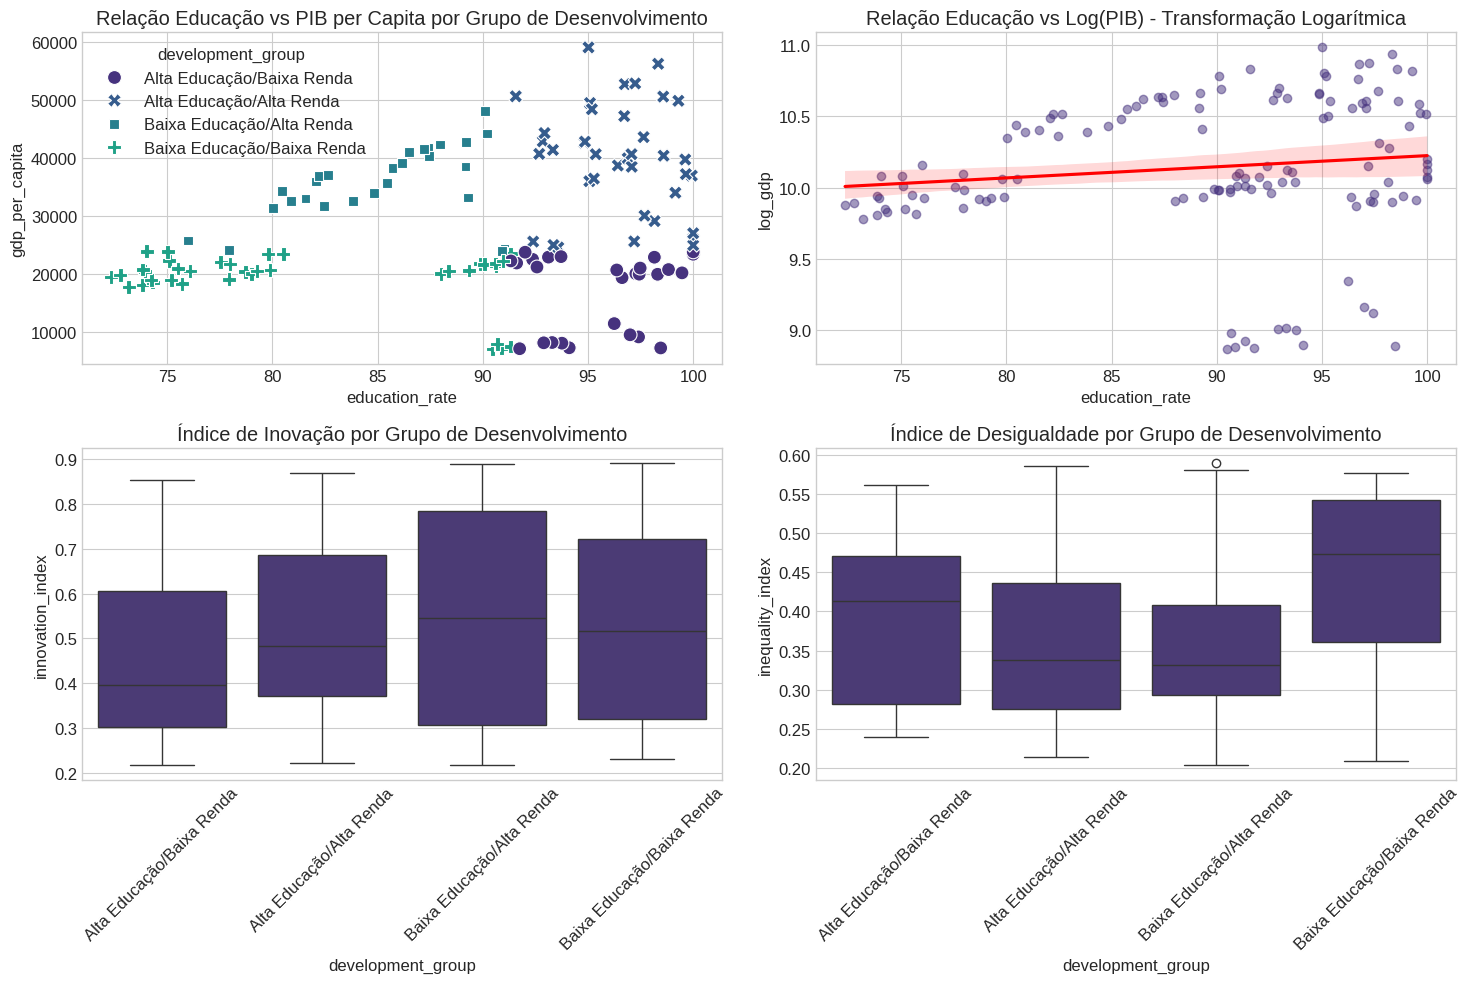

Análise por Grupos de Desenvolvimento:
                            gdp_per_capita  education_rate  \
development_group                                            
Alta Educação/Alta Renda          39758.69           96.46   
Alta Educação/Baixa Renda         17238.44           95.62   
Baixa Educação/Alta Renda         35695.49           85.14   
Baixa Educação/Baixa Renda        19431.93           81.28   

                            education_expenditure  innovation_index  \
development_group                                                     
Alta Educação/Alta Renda                     5.00              0.53   
Alta Educação/Baixa Renda                    5.15              0.46   
Baixa Educação/Alta Renda                    5.19              0.54   
Baixa Educação/Baixa Renda                   5.91              0.54   

                            inequality_index  country  
development_group                                      
Alta Educação/Alta Renda                0.36     

In [3]:
# %% [markdown]
# ## Análise Aprofundada dos Resultados

# %%
# Reavaliando a relação com transformações nos dados
def advanced_analysis(df):
    """Análise avançada dos dados"""
    
    # Verificar não-linearidades
    df['education_sq'] = df['education_rate'] ** 2
    df['log_gdp'] = np.log(df['gdp_per_capita'])
    
    # Análise por quadrantes de desenvolvimento
    median_edu = df['education_rate'].median()
    median_gdp = df['gdp_per_capita'].median()
    
    df['development_group'] = 'Baixa Educação/Baixa Renda'
    df.loc[(df['education_rate'] >= median_edu) & (df['gdp_per_capita'] < median_gdp), 
           'development_group'] = 'Alta Educação/Baixa Renda'
    df.loc[(df['education_rate'] < median_edu) & (df['gdp_per_capita'] >= median_gdp), 
           'development_group'] = 'Baixa Educação/Alta Renda'
    df.loc[(df['education_rate'] >= median_edu) & (df['gdp_per_capita'] >= median_gdp), 
           'development_group'] = 'Alta Educação/Alta Renda'
    
    return df

# %%
# Aplicar análise avançada
df_advanced = advanced_analysis(df)

# Verificar relações não-lineares
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.scatterplot(data=df_advanced, x='education_rate', y='gdp_per_capita', 
                hue='development_group', style='development_group', s=100)
plt.title('Relação Educação vs PIB per Capita por Grupo de Desenvolvimento')

plt.subplot(2, 2, 2)
sns.regplot(data=df_advanced, x='education_rate', y='log_gdp', 
            scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Relação Educação vs Log(PIB) - Transformação Logarítmica')

plt.subplot(2, 2, 3)
sns.boxplot(data=df_advanced, x='development_group', y='innovation_index')
plt.title('Índice de Inovação por Grupo de Desenvolvimento')
plt.xticks(rotation=45)

plt.subplot(2, 2, 4)
sns.boxplot(data=df_advanced, x='development_group', y='inequality_index')
plt.title('Índice de Desigualdade por Grupo de Desenvolvimento')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# %%
# Análise dos países por grupo
group_analysis = df_advanced.groupby('development_group').agg({
    'gdp_per_capita': 'mean',
    'education_rate': 'mean',
    'education_expenditure': 'mean',
    'innovation_index': 'mean',
    'inequality_index': 'mean',
    'country': 'count'
}).round(2)

print("Análise por Grupos de Desenvolvimento:")
print(group_analysis)

# %%
# Testar modelo não-linear
X_nl = df_advanced[['education_rate', 'education_sq', 'education_expenditure', 
                   'innovation_index', 'inequality_index']]
y_nl = df_advanced['log_gdp']

X_nl = sm.add_constant(X_nl)
model_nl = sm.OLS(y_nl, X_nl).fit()

print("Resultados do Modelo Não-Linear:")
print(model_nl.summary())